#### 模板匹配

模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别
程度，这个差别程度在opencv中有6种，然后将每次计算的结果放入一个矩阵中，作为结果输出，加入原图
形是A×B大小，而模板是a×b大小，则输出结果的矩阵是(A-a+1)×(B-b+1)

In [24]:
import  cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
img = cv2.imread('images/lena.jpg',0)
template = cv2.imread('images/face.jpg',0)
h , w = template.shape[:2]

In [26]:
img.shape

(500, 500)

In [27]:
template.shape

(277, 243)

 - TM_SQDIFF：计算平方不同，计算出来的值越小，越相关
 - TM_CCORR: 计算相关性，计算出来的值越大，越相关
 - TM_CCOEFF: 计算相关系数，计算出来的值越大，越相关
 - TM_SQDIFF_NORMED: 计算归一化平方不同，计算出来的值越接近0，越相关
 - TM_CCORR_NORMED: 计算归一化相关性，计算出来的值越接近1，越相关
 - TM_CCOEFF_NORMED: 计算归一化相关系数，计算出来的值越接近1，越相关
 使用时最好使用带归一化的方法

In [67]:
method = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

In [68]:
res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF_NORMED)
res.shape

(224, 258)

In [60]:
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

In [61]:
min_val

0.003967564553022385

In [62]:
max_val

0.5104073286056519

In [63]:
min_loc

(131, 131)

In [64]:
max_loc

(0, 199)

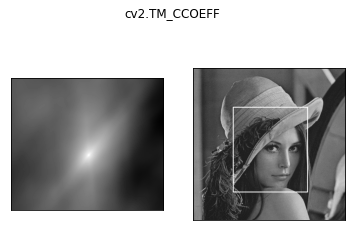

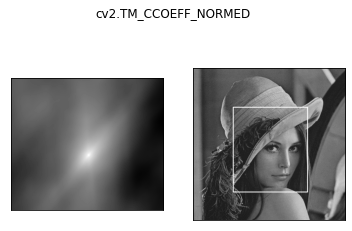

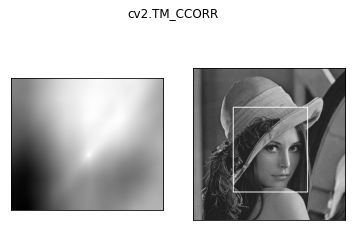

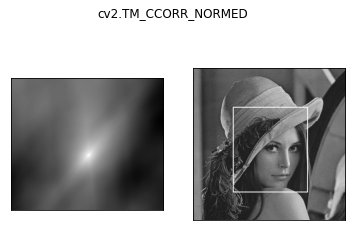

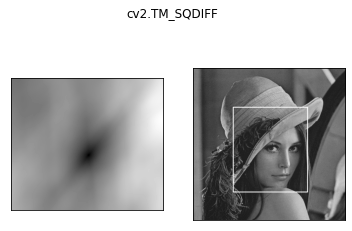

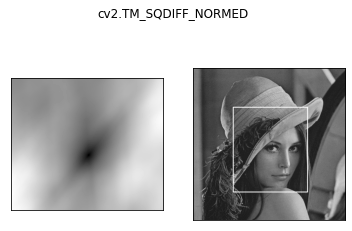

In [69]:
# 比较六种方法匹配结果的不同
for meth in method:
    img2 = img.copy()
    # 匹配方法的真值
    method = eval(meth)
    res = cv2.matchTemplate(img2,template,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    # 如果是平方差匹配或归一平方差匹配，取最小值
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w,top_left[1] + h)
    
    # 画矩形
    cv2.rectangle(img2,top_left,bottom_right,255,2)
    
    plt.subplot(121),plt.imshow(res,cmap='gray')
    plt.xticks([]),plt.yticks([])   # 隐藏坐标轴
    plt.subplot(122),plt.imshow(img2,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.suptitle(meth)
    plt.show()